<a href="https://colab.research.google.com/github/jashan-arora/Sampling-Assignment/blob/main/SamplingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Assignment
### Jashan Arora 102003206 3COE9

**Reading Data from the csv File**


In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import random
import math
random.seed(283)
data = pd.read_csv('/content/drive/MyDrive/Creditcard_data.csv')

**Data PreProcessing**

In [83]:
from sklearn.preprocessing import StandardScaler
X=data.drop('Class', axis=1)
y=data['Class']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

**Splitting the Data into Training and Testing Datasets**

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y , test_size=0.30, random_state=41,stratify=data['Class'])

**Balancing the Training Dataset using SMOTE**

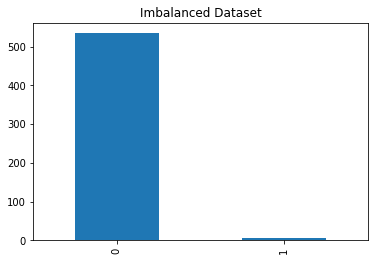

In [85]:
y_train.value_counts().plot(kind='bar',title="Imbalanced Dataset")

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
balanced_df = pd.concat([X_resampled, y_resampled], axis=1).sample(frac=1,random_state=12)

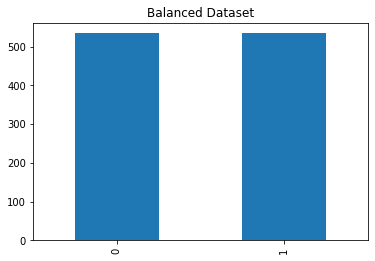

In [87]:
y_resampled.value_counts().plot(kind='bar',title="Balanced Dataset")

### Creation of Different Samples Using Various Sampling Techniques




**Random Sampling**

In [88]:
Z=1.96
E=0.05
p=0.5
random_sample_size = math.floor((Z**2*p*(1-p))/(E**2))     # sample size = (Z^2*p*(1-p))/E^2
print("Sample Size : ",random_sample_size)
random_sample = balanced_df.sample(n=random_sample_size, replace=False,random_state=8)
print("Count of Different Classes in Sample")
random_sample['Class'].value_counts()

Sample Size :  384
Count of Different Classes in Sample


1    200
0    184
Name: Class, dtype: int64

**Systematic Sampling**

In [89]:
def systematic_sample(df, sample_size, start):
    return df.iloc[[int(start + i * step) for i in range(sample_size)]]
Z=1.96
E=0.05
p=0.5
systematic_sample_size = math.floor((Z**2*p*(1-p))/(E**2))     # sample size = (Z^2*p*(1-p))/E^2
print("Sample Size : ",systematic_sample_size)
step = len(data) / systematic_sample_size
start = random.uniform(0, step)
systematic_sample = systematic_sample(balanced_df, systematic_sample_size, start)
print("Count of Different Classes in Sample")
systematic_sample['Class'].value_counts()

Sample Size :  384
Count of Different Classes in Sample


1    200
0    184
Name: Class, dtype: int64

**Startified Random Sampling**

In [90]:
Z=1.96
E=0.1
p=0.5
S=balanced_df['Class'].nunique()
stratified_sample_size = math.floor((Z**2*p*(1-p))/((E/S)**2))     # sample size = (Z^2*p*(1-p))/(E/S)^2
print("Sample Size : ",stratified_sample_size)
stratified_sample=balanced_df.groupby('Class', group_keys=False).apply(lambda x: x.sample(int(stratified_sample_size/S),random_state=23))
print("Count of Different Classes in Sample")
stratified_sample['Class'].value_counts()

Sample Size :  384
Count of Different Classes in Sample


0    192
1    192
Name: Class, dtype: int64

**Cluster Sampling**

In [91]:
from sklearn.cluster import KMeans
Z=1.96
E=0.2555
p=0.5
C=5
cluster_sample_size = math.floor((Z**2*p*(1-p))/((E/C)**2))     # sample size = (Z^2*p*(1-p))/(E/C)^2
print("Sample Size : ",cluster_sample_size)
kmeans = KMeans(n_clusters=C,random_state=18)
kmeans.fit(balanced_df.values)
labels = kmeans.labels_
cluster_sample = balanced_df[labels==2]
print("Count of Different Classes in Sample")
print(cluster_sample['Class'].value_counts())

Sample Size :  367
Count of Different Classes in Sample
0    221
1    146
Name: Class, dtype: int64


**Convenience Sampling**

In [92]:
Z=1.96
E=0.05
p=0.5
convenience_sample_size = math.floor((Z**2*p*(1-p))/(E**2))     # sample size = (Z^2*p*(1-p))/E^2
print("Sample Size : ",convenience_sample_size)
convenience_sample = balanced_df.head(n=convenience_sample_size)
print("Count of Different Classes in Sample")
convenience_sample['Class'].value_counts()

Sample Size :  384
Count of Different Classes in Sample


1    197
0    187
Name: Class, dtype: int64

### Applying Different Classification Models on Different Samples

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': RandomForestClassifier(random_state=27),
    'Decision Tree': DecisionTreeClassifier(random_state=28),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=15),
    'Ridge Classifier': RidgeClassifier(random_state=12)
}
samples={'Random Sampling':random_sample,'Systematic Sampling':systematic_sample,'Stratified Sampling':stratified_sample,'Cluster Sampling':cluster_sample,'Convenience Sampling':convenience_sample}

In [94]:
result=[]
for model_name,model in models.items():
  accs=[]
  for sample_name,sample in samples.items():
      model.fit(sample.drop('Class',axis=1), sample['Class'])
      y_pred = model.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      accs.append(acc)
  result.append(accs)

**Transforming Accuracies obtained into Dataframe**

In [95]:
columns=list(samples.keys())
rownames=list(list(models.keys()))
Accuracy_Table=pd.DataFrame(result,columns=columns,index=rownames)

**Comparison of Accuracies obtained using Different Models and Sampling Techniques**

In [96]:
Accuracy_Table

,Random Sampling,Systematic Sampling,Stratified Sampling,Cluster Sampling,Convenience Sampling
Random Forest,0.987069,0.982759,0.991379,0.987069,0.987069
Decision Tree,0.956897,0.939655,0.969828,0.939655,0.948276
Gaussian Naive Bayes,0.862069,0.883621,0.836207,0.982759,0.849138
Logistic Regression,0.862069,0.870690,0.875000,0.586207,0.870690
Ridge Classifier,0.836207,0.844828,0.844828,0.478448,0.823276
